In [ ]:
install.packages("ggplot2")
install.packages("reshape2")
install.packages("inspectdf")
install.packages("e1071")
install.packages("klaR")
install.packages("naivebayes")
install.packages("caret")
install.packages("caTools")
library(ggplot2)
library(reshape2)
library(inspectdf)
library(e1071)
library(klaR)
library(naivebayes)
library(dplyr)
library(caret)
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘markdown’, ‘png’, ‘jpeg’, ‘shades’, ‘gridtext’, ‘ggfittext’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [ ]:
bank_data <- read.csv("bank-additional-full.csv", sep = ";", header = TRUE)


Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


In [ ]:
glimpse(bank_data)

Rows: 29,543
Columns: 21
$ age            <int> 56, 57, 37, 40, 56, 45, 59, 41, 24, 25, 41, 25, 29, 57,…
$ job            <chr> "housemaid", "services", "services", "admin.", "service…
$ marital        <chr> "married", "married", "married", "married", "married", …
$ education      <chr> "basic.4y", "high.school", "high.school", "basic.6y", "…
$ default        <chr> "no", "unknown", "no", "no", "no", "unknown", "no", "un…
$ housing        <chr> "no", "no", "yes", "no", "no", "no", "no", "no", "yes",…
$ loan           <chr> "no", "no", "no", "no", "yes", "no", "no", "no", "no", …
$ contact        <chr> "telephone", "telephone", "telephone", "telephone", "te…
$ month          <chr> "may", "may", "may", "may", "may", "may", "may", "may",…
$ day_of_week    <chr> "mon", "mon", "mon", "mon", "mon", "mon", "mon", "mon",…
$ duration       <int> 261, 149, 226, 151, 307, 198, 139, 217, 380, 50, 55, 22…
$ campaign       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ pdays        

# Exploratory data analysis

In [ ]:
# replace "unknown" label with NA
bank_data[bank_data == "unknown"] <- NA

# check for missing values in each categorical attribute
cat_attributes <- c("job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y")
for (attr in cat_attributes) {
  cat("Missing values in", attr, ": ", sum(is.na(bank_data[,attr])), "\n")
}

Missing values in job :  249 
Missing values in marital :  50 
Missing values in education :  1236 
Missing values in default :  7441 
Missing values in housing :  708 
Missing values in loan :  708 
Missing values in contact :  0 
Missing values in month :  0 
Missing values in poutcome :  0 
Missing values in y :  0 


From the figure below, we can have a quick and overall view of the whole dataset distribution. For example, we can say that more than 50% of the customers in this data are married, have high school or higher degree.

Also, most of them currently don't have any loan. This could be some initial insights that can be used.

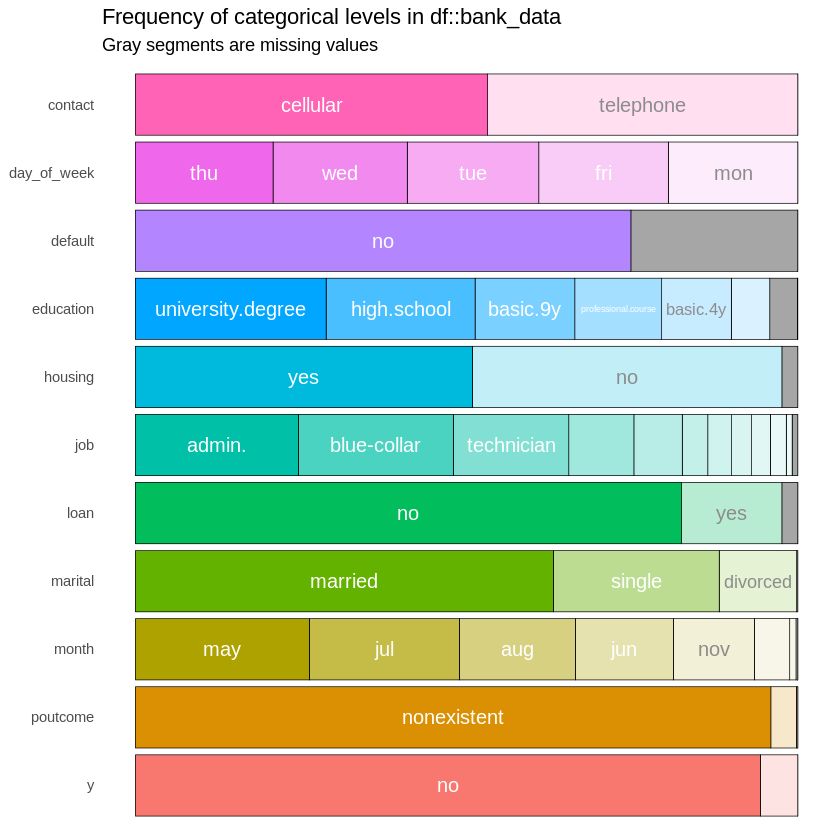

In [ ]:
data_cat_inspect <- inspect_cat(bank_data)
show_plot(data_cat_inspect)


Attribute meaning:
- contact: contact communication type
- day_of_week: last contact day of the week
- default: has credit in default?
- poutcome: outcome of the previous marketing campaign
- y - has the client subscribed a term deposit?

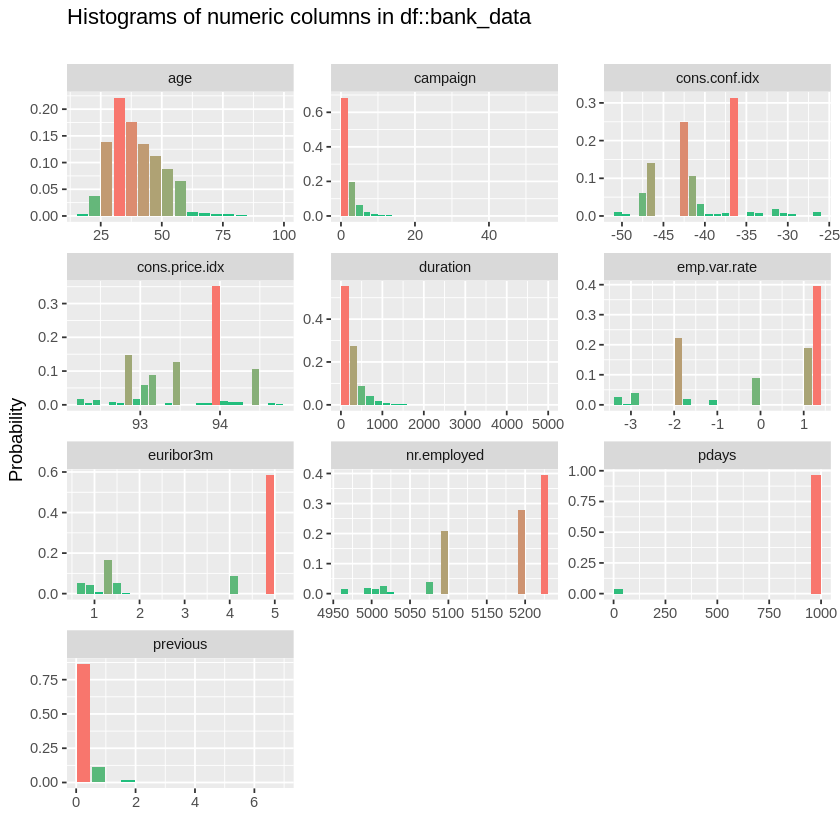

In [ ]:
#Explore numeric variables
data_num_inspect <- inspect_num(bank_data)
show_plot(data_num_inspect)


Numeric attributes meaning:
- campaign: number of contacts performed during this campaign and for this client
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- duration: last contact duration, in seconds (numeric)
- euribor3m: euribor 3 month rate - daily indicator
- nr.employed: number of employees - quarterly indicator
- pdays: number of days that passed by after the client was last contacted from a previous campaign
- previous: number of contacts performed before this campaign and for this client

## Data preprocessing

In [ ]:
# Initializes random generator
set.seed(1)

In [ ]:
# Convert categorical data to factors
bank_data$job = factor(bank_data$job)
bank_data$marital = factor(bank_data$marital)
bank_data$education = factor(bank_data$education)
bank_data$default = factor(bank_data$default)
bank_data$housing = factor(bank_data$housing)
bank_data$loan = factor(bank_data$loan)
bank_data$contact = factor(bank_data$contact)
bank_data$month = factor(bank_data$month)
bank_data$poutcome = factor(bank_data$poutcome)
bank_data$y = factor(bank_data$y)


In [ ]:
num_yes <- sum(bank_data$y =="yes")
num_no <- sum(bank_data$y =="no")
remove_rows <- sample(which(bank_data$y == "no"), num_no - num_yes)
balanced_data <- bank_data[-remove_rows,]

# Randomly splitting the dataset into the Training set and Test set
split = sample.split(balanced_data$y, SplitRatio = 0.7)
train = subset(balanced_data, split == TRUE)
test = subset(balanced_data, split == FALSE)

# Naive Bayes

In [ ]:
# Install pROC package
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
#Naive Bayes
#laplace = 1 to eliminate zero observations problem
naive_bayes = naiveBayes(y ~., data=train, laplace = 1)
naive_bayes_prediction = predict(naive_bayes, test)

cm <- table(naive_bayes_prediction, test$y)

table(naive_bayes_prediction, test$y)
naive_bayes_accuracy = round(mean(naive_bayes_prediction == test$y)*100, digits=2)
cat("Naive Bayes accuracy:", naive_bayes_accuracy, "%", sep=" ")




                      
naive_bayes_prediction      no yes
                         0   0   0
                   no    0 448 186
                   yes   0  52 314

Naive Bayes accuracy: 76.2 %

- The Naive Bayes classifier is robust when it comes to missing values since it handles input features independently during model construction and prediction. As a result, we can simply disregard missing values without affecting the algorithm's performance.

- The Naive Bayes classifier has a limited number of parameters. In some implementations, the only parameter is the number of classes, which is often fixed and beyond our control in practice. Consequently, traditional methods like hyper-parameter tuning are not applicable for improving the accuracy of the Naive Bayes classifier.

Setting levels: control = no, case = yes

Setting direction: controls < cases




Call:
roc.default(response = test$y, predictor = naive_bayes_probs)

Data: naive_bayes_probs in 1392 controls (test$y no) < 1392 cases (test$y yes).
Area under the curve: 0.8663
Precision:  0.7636494 
Recall:  0.8089802 
F1-score:  0.7856615 


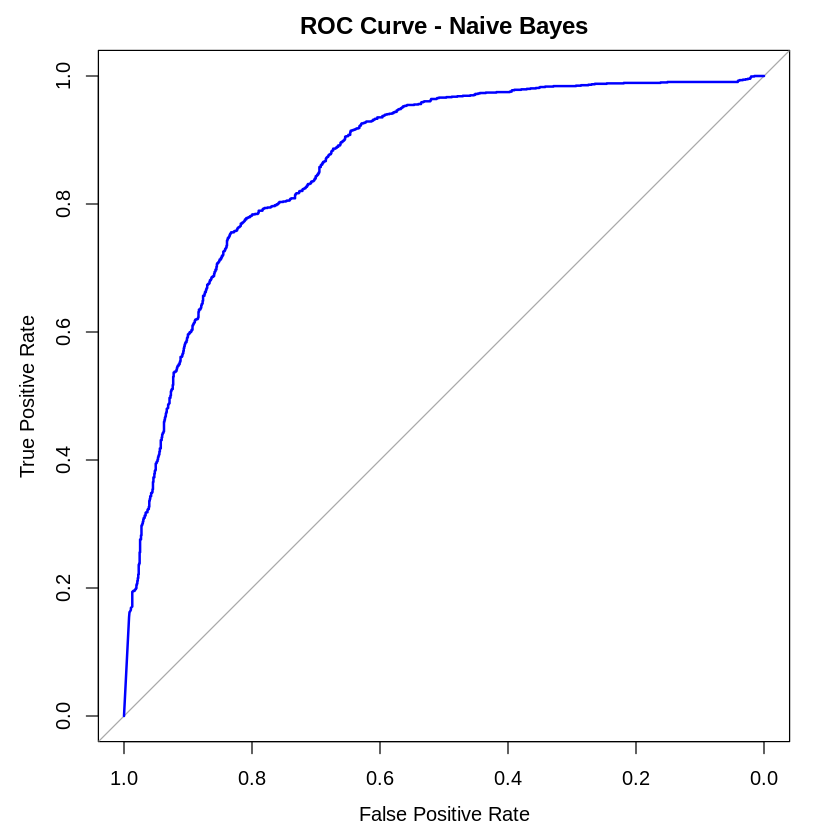

In [ ]:
# Predict probabilities for the test set
naive_bayes_probs <- predict(naive_bayes, test, type = "raw")[, "yes"]

naive_bayes_roc <- roc(test$y, naive_bayes_probs)

# Produce the ROC curve
print(naive_bayes_roc)
plot(naive_bayes_roc, main = "ROC Curve - Naive Bayes", col = "blue", xlab = "False Positive Rate", ylab = "True Positive Rate")

tp <- cm[2,2] #truepositive
fp <- cm[1,2] #falsepositive
fn <- cm[2,1] #falsenegative

# Calculate precision, recall, and F1-score
precision <- tp / (tp + fp)
recall <- tp / (tp + fn)
f1_score <- 2 * (precision * recall) / (precision + recall)

# Print the results
cat("Precision: ", precision, "\n")
cat("Recall: ", recall, "\n")
cat("F1-score: ", f1_score, "\n")


# Decision Tree

In [ ]:
library(rpart)
install.packages(c("rpart", "rpart.plot"))
library(rpart.plot)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# training model
# rpart() function can handle both numerical and categorical so no need to bin
# manually
dt_model <- rpart(y ~ ., data = train, method = "class")
dt_model

n= 6496 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 6496 3248 no (0.50000000 0.50000000)  
   2) duration< 249.5 3107  787 no (0.74670100 0.25329900)  
     4) nr.employed>=5087.65 2356  221 no (0.90619694 0.09380306)  
       8) month=aug,dec,jul,jun,may,nov 2060   48 no (0.97669903 0.02330097) *
       9) month=apr,mar,oct 296  123 yes (0.41554054 0.58445946)  
        18) duration< 95.5 58    8 no (0.86206897 0.13793103) *
        19) duration>=95.5 238   73 yes (0.30672269 0.69327731) *
     5) nr.employed< 5087.65 751  185 yes (0.24633822 0.75366178) *
   3) duration>=249.5 3389  928 yes (0.27382709 0.72617291)  
     6) emp.var.rate>=-0.6 1585  693 yes (0.43722397 0.56277603)  
      12) duration< 521.5 623  114 no (0.81701445 0.18298555) *
      13) duration>=521.5 962  184 yes (0.19126819 0.80873181) *
     7) emp.var.rate< -0.6 1804  235 yes (0.13026608 0.86973392) *

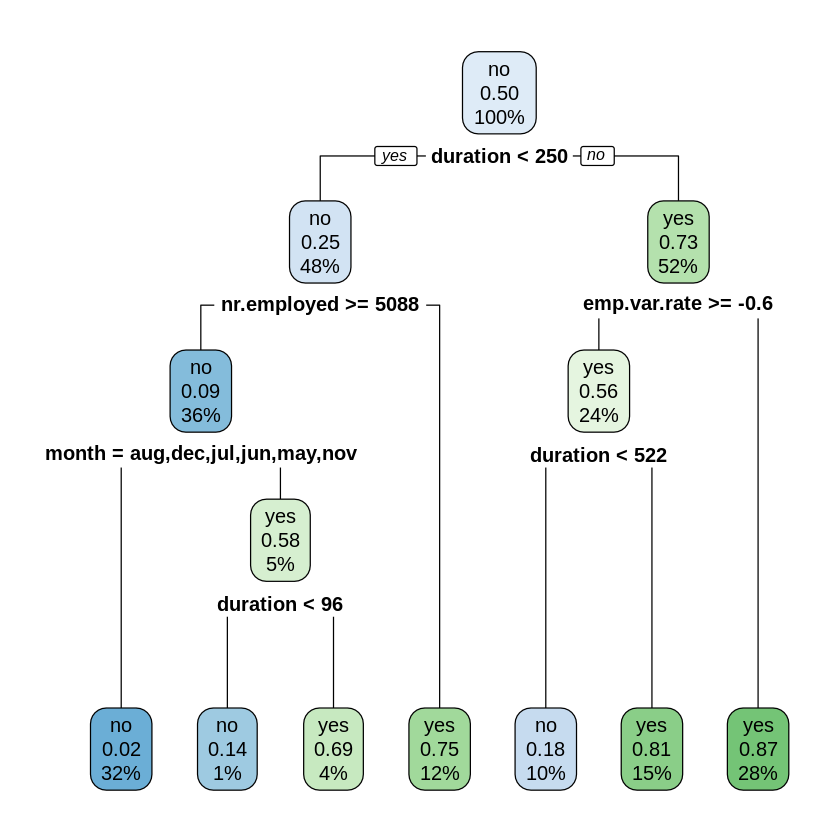

In [ ]:
# visualize rules for each node
# the final leaf nodes indicate the predicted class along side the percentage
# of the observations
rpart.plot(dt_model)

In [ ]:
# Generate predictions using decision tree
preds_dt <- predict(dt_model, newdata = test, type = "class")

# Confusion matrix
cm_dt <- table(test$y, preds_dt)

# Accuracy calculation
accuracy_dt <- sum(diag(cm_dt)) / sum(cm_dt)

# Print confusion matrix and accuracy
print(cm_dt)
print(accuracy_dt)


     preds_dt
        no  yes
  no  1092  300
  yes   80 1312
[1] 0.8635057
